In [1]:
# Import all of your necessary packages:
import pandas as pd
import numpy as np

#For the visualizations import:
import seaborn as sns
import matplotlib.pyplot as plt

#And for the statistical tests:
import scipy.stats as stats

In [2]:
# Now lets import our dataset using the pd.read_csv function
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# To stay with best practices, we use the head function to look 
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# We notice that the columns for items1 through 8 could be named a bit more obviously. Lets change those names.
churn_df.rename(columns ={'Item1':'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 'Item4':'Reliablility', 'Item5':'Plentiful_Options', 'Item6':'Respectfullness', 'Item7':'Courteous_Exchanges', 'Item8':'Active_Listening'}, inplace=True)

In [5]:
# We see that the values in the monthly charge column have alot of values after the decimal point. Lets round that to the nearest 100th decimal place.
churn_df['MonthlyCharge'] = churn_df['MonthlyCharge'].apply(lambda x: round(x, 2))

In [6]:
# Lets pull the head of the dataframe again to make sure our changes went through.
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliablility,Plentiful_Options,Respectfullness,Courteous_Exchanges,Active_Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.46,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.63,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.95,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.96,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.95,271.493436,4,4,4,3,4,4,4,5


In [7]:
# Now that that is done, lets focus in on the columns we are interested in in regard to answering our intial question. 
# I am definitely interested in the churn variable. Comparing that to the Monthly Charge variable should give us some insight on how the amount they are charged affects the customer churn.
interest_df = churn_df[['Churn','MonthlyCharge']].copy()

In [8]:
#Like before, lets check the head of our dataframe of interest.
interest_df.head()

,Churn,MonthlyCharge
0,No,172.46
1,Yes,242.63
2,No,159.95
3,No,119.96
4,Yes,149.95


In [9]:
# After initially creating a stacked bar chart, the x-axis was found to be much too cluttered.  

#To remedy this, I rounded the MonthlyCharge variable's values to the nearest $10 place 
interest_df['MonthlyCharge'] = np.floor(interest_df['MonthlyCharge'] / 10) * 10

print(interest_df.head())

  Churn  MonthlyCharge
0    No          170.0
1   Yes          240.0
2    No          150.0
3    No          110.0
4   Yes          140.0


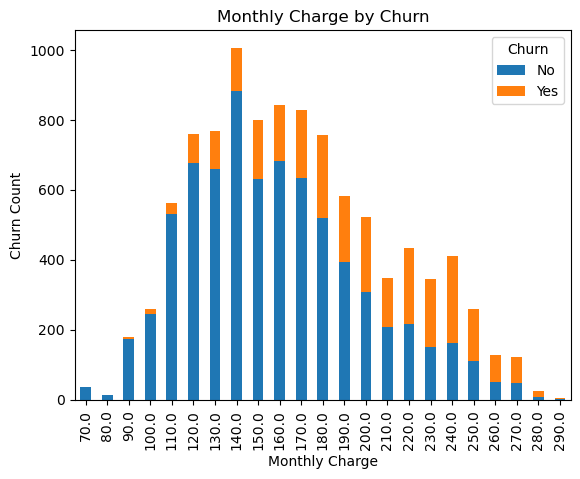

In [10]:
# Now that we have sequestered the data that we need, lets create a pivot table using our two variables for the X and Y axises.
tbl = pd.pivot_table(interest_df.groupby(['MonthlyCharge', 'Churn']).size().reset_index(),
                     values=0,
                     index='MonthlyCharge',
                     columns=['Churn'],
                     aggfunc=sum)

# Plot the stacked bar chart
tbl.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Monthly Charge')
plt.ylabel('Churn Count')
plt.title('Monthly Charge by Churn')

plt.show()

In [11]:
# Now that we have a better understanding of our variables and their relationship, lets run a T-test to see if we can trust the observations.

# Separate the MonthlyCharge values for churned and non-churned customers, you will compare these two.
monthly_charge_churned = interest_df[interest_df['Churn'] == 'Yes']['MonthlyCharge']
monthly_charge_non_churned = interest_df[interest_df['Churn'] == 'No']['MonthlyCharge']

# Next we actually perform the t-test
t_statistic, p_value = stats.ttest_ind(monthly_charge_churned, monthly_charge_non_churned)

# Print the results
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value) 

T-Statistic:  40.368267377814945
P-Value:  0.0


In [12]:
# Next thing we are tasked to do is identify the distribution of two continuous variables and two categorical variables using univaritae statistics.

#First lets pull out two of each type of variable and put them into their own dataframes.
continuous_df = churn_df[['MonthlyCharge', 'Tenure']].copy()
categorical_df = churn_df[['Churn', 'Timely_Response']].copy()

In [13]:
# Use head() to get a quick glance of the dataframes 
continuous_df.head()


,MonthlyCharge,Tenure
0,172.46,6.795513
1,242.63,1.156681
2,159.95,15.754144
3,119.96,17.087227
4,149.95,1.670972


In [14]:
categorical_df.head()

,Churn,Timely_Response
0,No,5
1,Yes,3
2,No,4
3,No,4
4,Yes,4


In [15]:
# We can start off with the continuous variables first. 

#Stats for continuous variables
continuous_df.describe()

,MonthlyCharge,Tenure
count,10000.000000,10000.000000
mean,172.624798,34.526188
std,42.942984,26.443063
min,79.980000,1.000259
25%,139.980000,7.917694
50%,167.480000,35.430507
75%,200.737500,61.479795
max,290.160000,71.999280


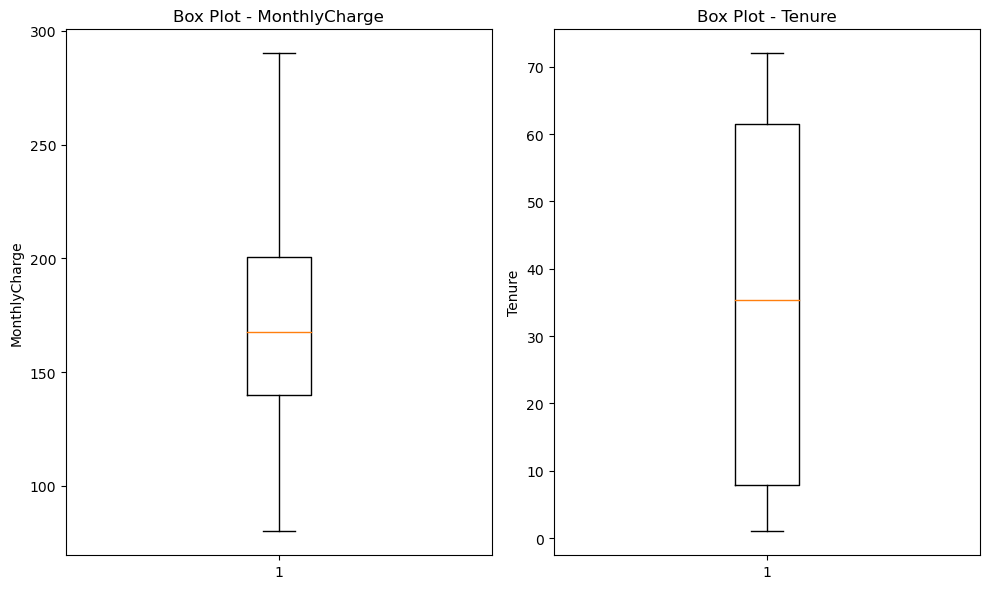

In [16]:
# Next lets make a Box plot for MonthlyCharge and Tenure
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].boxplot(continuous_df['MonthlyCharge'])
axes[0].set_title('Box Plot - MonthlyCharge')
axes[0].set_ylabel('MonthlyCharge')
axes[1].boxplot(continuous_df['Tenure'])
axes[1].set_title('Box Plot - Tenure')
axes[1].set_ylabel('Tenure')

# Show the box plots, plt.tight_layout to ensure everything fits
plt.tight_layout()
plt.show()

In [17]:
# Now lets do the same thing for the catgorical variables

# Lets pull up the distribution stats for the categorical variables
categorical_df.describe()

#The distribution of the box plot for monthly charge is uniform. 
#I beleive this is the case due to the median not being skewed towards one end of the box vs another

#The distribution of the box plot for tenure is also uniform. 
#I beleive this is the case for the same reason as above, due to the median not being skewed towards one end of the box vs another

,Timely_Response
count,10000.000000
mean,3.490800
std,1.037797
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,7.000000


In [41]:
#For some reason the describe function above did not show the info for the Churn variable so I specified the variable below
categorical_df['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [ ]:
# From the above describe function you can see that 7,350 people selected No and 2,650 people selected yes

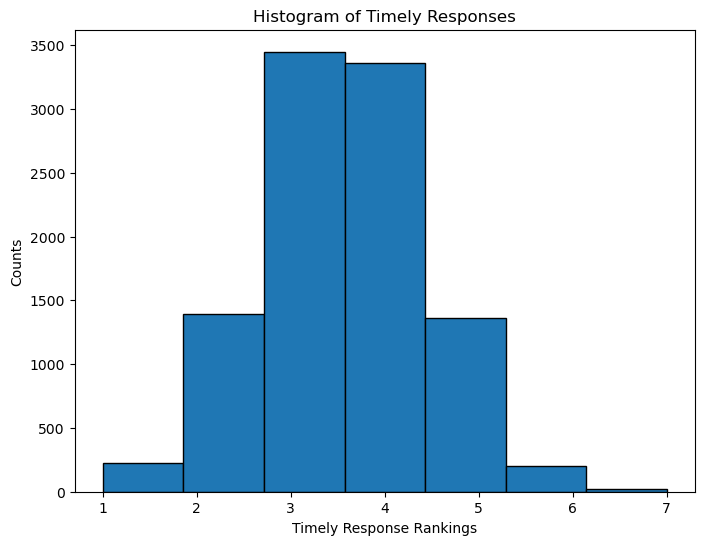

In [18]:
# Lets make bar plots for each of our two categorical variables 

#First we have our Timely Response Variable
plt.figure(figsize=(8, 6))
plt.hist(categorical_df['Timely_Response'], bins=7, edgecolor= 'black')
plt.xlabel('Timely Response Rankings')
plt.ylabel('Counts')
plt.title('Histogram of Timely Responses')
plt.show()

In [ ]:
# The bar chart above shows a normal bell curve with the majority of individuals ranking the importance of this a 3-4
# I beleive that this is the case due to the people who rated the timely response 3-4 putting more value into another aspect.
# If we take a look at the pairplot below, it also coincides with the jump in churn that occurs with the monthly charge variable around $200

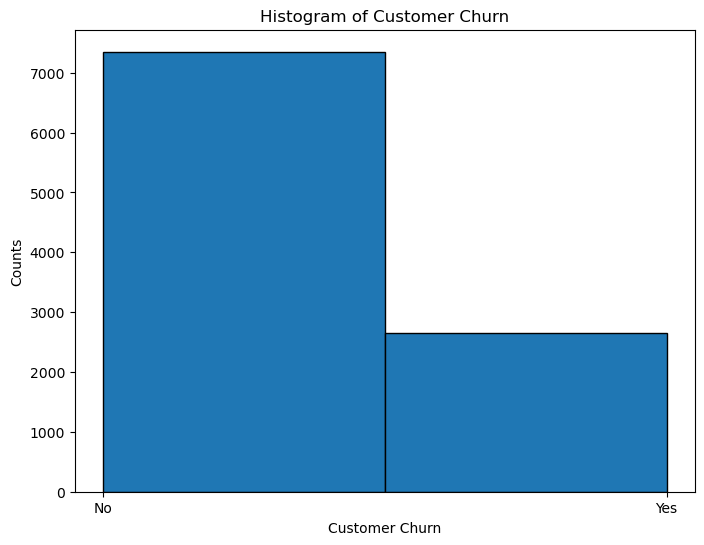

In [38]:
# Next we have our Churn variable itself (will just be yes and no).
plt.figure(figsize=(8, 6))
plt.hist(categorical_df['Churn'], bins=2, edgecolor='black')
plt.xlabel('Customer Churn')
plt.ylabel('Counts')
plt.title('Histogram of Customer Churn')
plt.show()

In [ ]:
#My second categorical variable is the customer churn. The above bar graph shows that around 2650 people have churned away. 
#I beleive that this is mainly the case due to the monthly charge, with increases in that variable causing more people to churn away. 

In [21]:
# Next we are tasked to do the same as above, but we will be using bivarate statistics instead of univarate.

# Continuing with the same variables that we used before. Lets make a dataframe with all four of our varibales in it
bivariate_df = churn_df[['MonthlyCharge', 'Tenure', 'Churn', 'Timely_Response']].copy()

#The Monthly Charge and Tenure variables are the continuous variables and the Churn and Timely Response are the categorical ones

In [22]:
# We used the describe function to gain insight on the bivariate_df
bivariate_df.describe()

,MonthlyCharge,Tenure,Timely_Response
count,10000.000000,10000.000000,10000.000000
mean,172.624798,34.526188,3.490800
std,42.942984,26.443063,1.037797
min,79.980000,1.000259,1.000000
25%,139.980000,7.917694,3.000000
50%,167.480000,35.430507,3.000000
75%,200.737500,61.479795,4.000000
max,290.160000,71.999280,7.000000


Text(0, 0.5, 'Tenure')

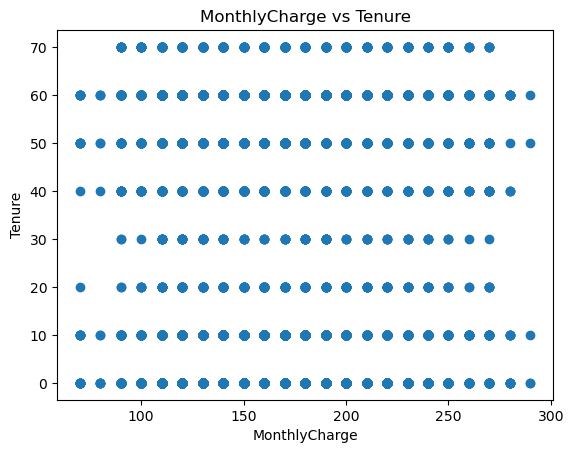

In [36]:
#Now lets create a scatterplot to compare our continuous variables.

#After initially making the scatter plot it was much too cluttered so I rounded both of the variables to the nearest 10s place 
bivariate_df['MonthlyCharge'] = np.floor(bivariate_df['MonthlyCharge'] / 10) * 10
bivariate_df['Tenure'] = np.floor(bivariate_df['Tenure'] / 10) * 10

#create scatterplot of MonthlyCharge vs. Tenure
plt.scatter(bivariate_df.MonthlyCharge, bivariate_df.Tenure)
plt.title('MonthlyCharge vs Tenure')
plt.xlabel('MonthlyCharge')
plt.ylabel('Tenure')

In [ ]:
#I used a scatterplot because it can accurately show the distribution between my two continuous variables vs one another. 
#From the above graph the relationship between the two variables looks to be pretty weak aside from a few 
# I feel as though this is the case due to the many additional factors that can go into determining the tenure a person uses a service outside of the montly charge.
# If you scroll down to the pair plot, churn is factored into that one as well and with that it ends up showing that most of the people who have a shorter tenure tend to leave due to higher monthly charges

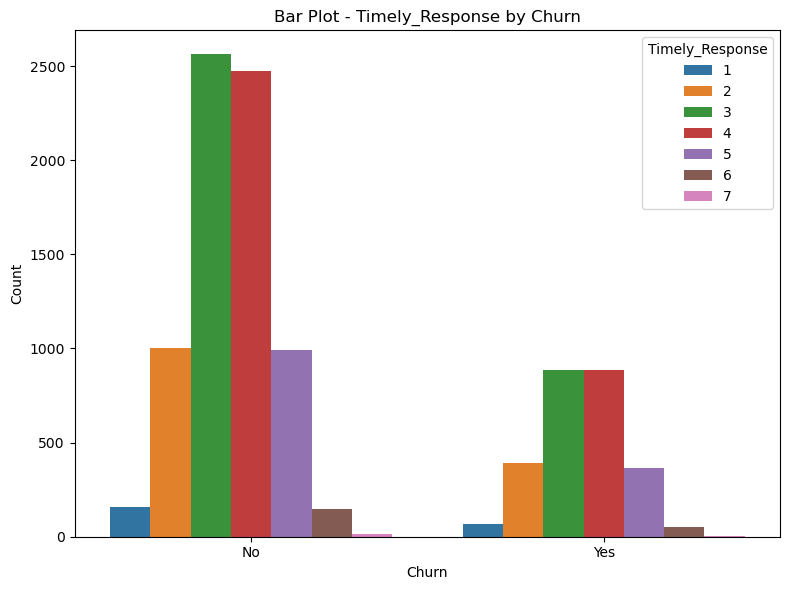

In [20]:
# Lets make bar plots comparing each of our two categorical variables 
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=categorical_df, x='Churn', hue='Timely_Response')
plt.title('Bar Plot - Timely_Response by Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Timely_Response', loc='upper right')
plt.tight_layout() 
plt.show()

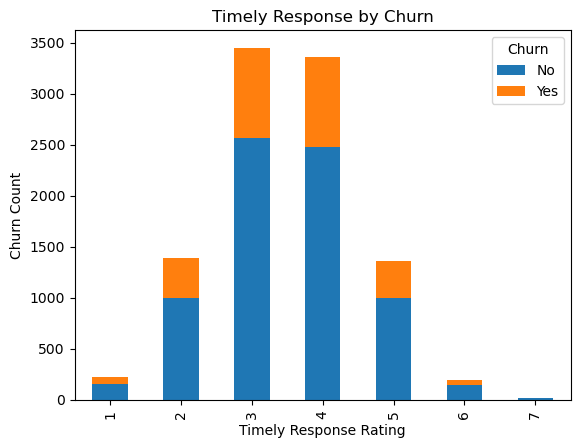

In [35]:
#Next lets create a stacked bar chart for our categorical data
tbl = pd.pivot_table(bivariate_df.groupby(['Timely_Response', 'Churn']).size().reset_index(),
                     values=0,
                     index='Timely_Response',
                     columns=['Churn'],
                     aggfunc=sum)

# Plot the stacked bar chart
tbl.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Timely Response Rating')
plt.ylabel('Churn Count')
plt.title('Timely Response by Churn')

plt.show()

In [ ]:
#The above stacked bar chart shows a normal bell curve with the majority of people churning out having a timely response rating of 3 or 4
#I beleive that this is the case due to the people who rated the timely response 3-4 putting more value into another aspect.
# If we take a look at the pairplot below, it also coincides with the jump in churn that occurs with the monthly charge variable around $200

/Users/chaunceyragin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


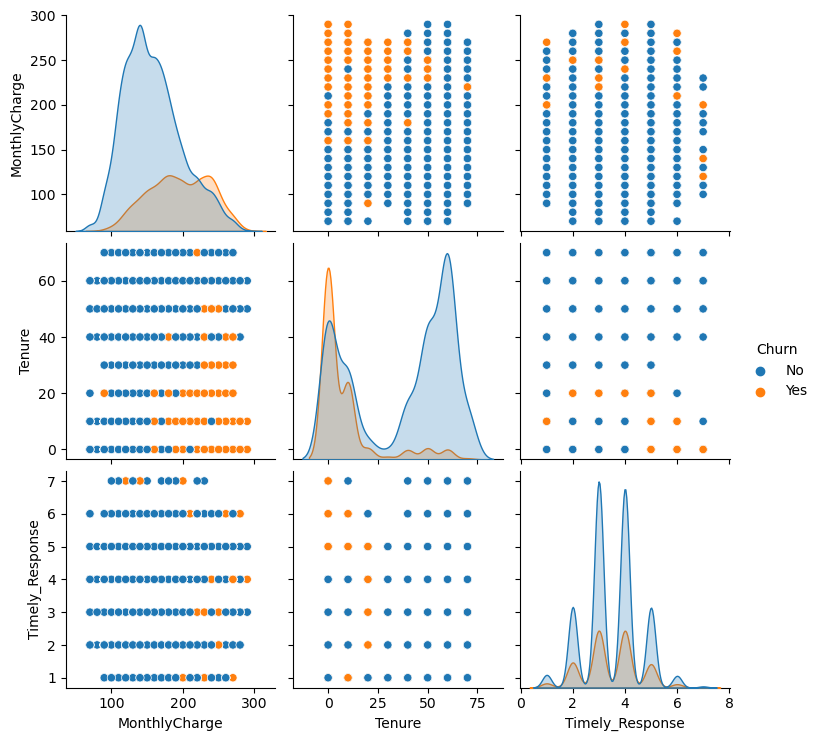

In [37]:
# Now lets use this nifty pairplot function for each of the varibles comparing them directly to churn to look for any correlations
sns.pairplot(bivariate_df, hue='Churn')
plt.show()

In [24]:
#From the above pairplot, we can see that there is a pretty linear distribution observed between the monthly charge and churn variables
# The higher the monthly charge, the shorter the tenure is before the customer churns on out. 